In [1]:
#Pkg.add("Colors")
using Images, FileIO, Interpolations, Colors, TestImages

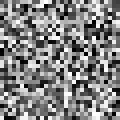

In [2]:
img = rand(30, 30)
Gray.(img)

In [3]:
function nearestZoom(img, scale)
    Height = size(img,1)
    Width = size(img, 2)
    grid = ([x for x = 1:Width], [y for y = 1:Height])
    nearest = Interpolations.interpolate(grid, img, Gridded(Constant()))
    img1 = zeros(scale*Height, scale*Width)
    for y in 1:scale*size(img,1)
        for x in 1:scale*size(img,2)
            img1[y,x] = nearest(((y-1)*(Height-1)/(scale*Height-1))+1, 1+((x-1)*(Width-1)/(scale*Width-1)))
        end
    end
    img1
end

nearestZoom (generic function with 1 method)

In [4]:
function bilinearZoom(img, scale)
    Height = size(img,1)
    Width = size(img, 2)
    grid = ([x for x = 1:Width], [y for y = 1:Height])
    nearest = Interpolations.interpolate(grid, img, Gridded(Linear()))
    img1 = zeros(scale*Height, scale*Width)
    for y in 1:scale*size(img,1)
        for x in 1:scale*size(img,2)
            img1[y,x] = nearest(((y-1)*(Height-1)/(scale*Height-1))+1, 1+((x-1)*(Width-1)/(scale*Width-1)))
        end
    end
    img1
end

bilinearZoom (generic function with 1 method)

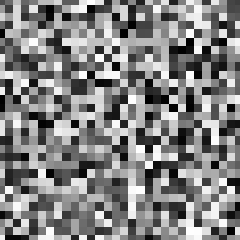

In [5]:
img1 = nearestZoom(img, 8)
Gray.(img1)

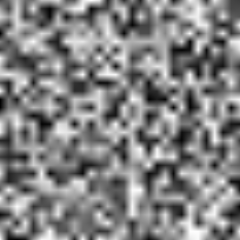

In [6]:
img2 = bilinearZoom(img, 8)
Gray.(img2)

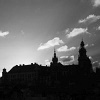

In [7]:
img = load("image.jpg")
img = Gray.(img)
imgTable = convert(Array{Float64}, img)
img

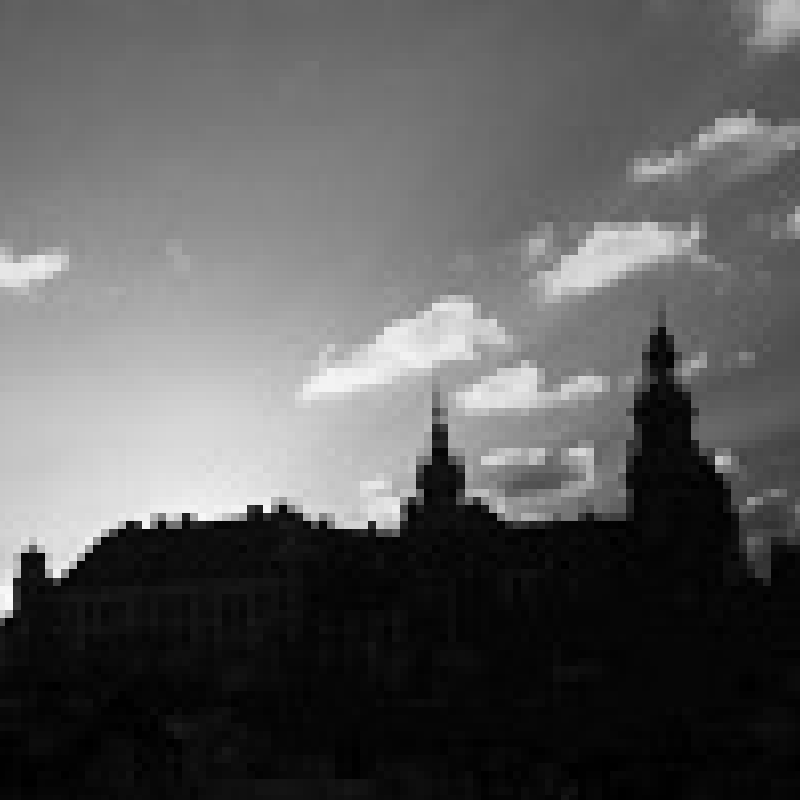

In [10]:
img1 = nearestZoom(img, 8)
Gray.(img1)

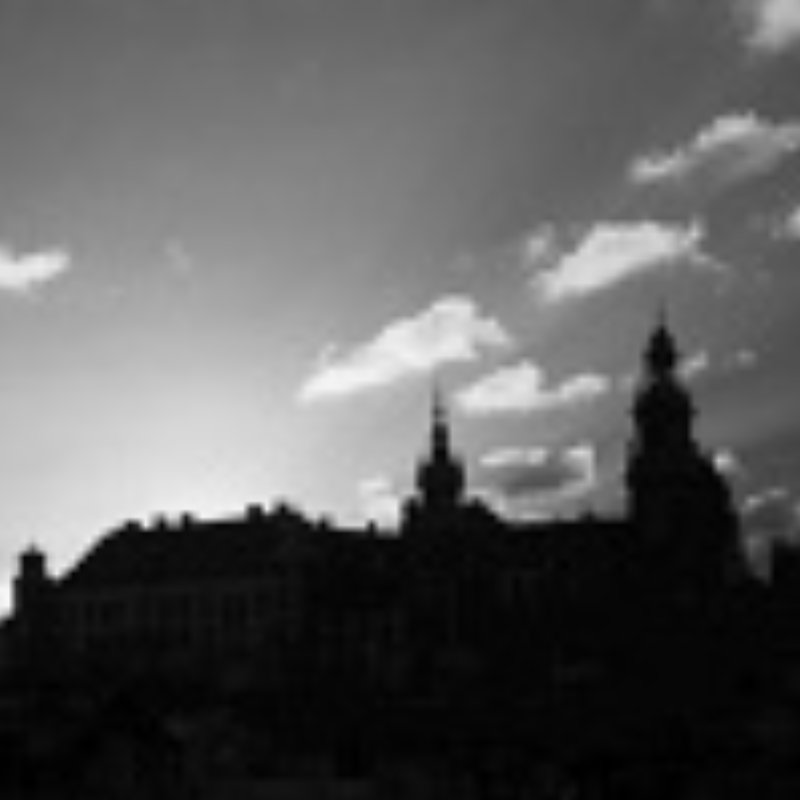

In [9]:
img2 = bilinearZoom(img, 8)
Gray.(img2)